In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import classificacao

sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df = pd.read_csv('conhecimento.csv')
df['dia'] = df.id_cena.str[-3:].astype(int)

id_cena = np.random.choice(df.id_cena, 1, replace=False)[0]
dia = int(id_cena[-3:])
print(df.shape, dia, id_cena)

teste_original = df[df.id_cena== id_cena].copy().reset_index(drop=True)
teste = teste_original.copy()
teste['verifica'] = 0
print(len(teste_original))

# Modelo
modelo = df[~(df.id_cena==id_cena)].copy()

print(len(modelo))
print(modelo.verifica.value_counts())

(388551, 15) 347 LS82210672016347
3203
385348
3    272275
1    113073
Name: verifica, dtype: int64


In [4]:
colunas_stats = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [5]:
y_pred = classificacao.classifica(modelo, teste, colunas_stats)
y_true = teste_original.sort_values('id').reset_index(drop=True)

Criando classificador RF
RF - Classifica dado usando as colunas ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']
Classificando com NN
Cria avaliacao usando (RF+NN)/2 - Arredondado para 3 casas decimais


Confusion matrix, without normalization
[[   8  103]
 [   1 3091]]
Normalized confusion matrix
[[7.20720721e-02 9.27927928e-01]
 [3.23415265e-04 9.99676585e-01]]


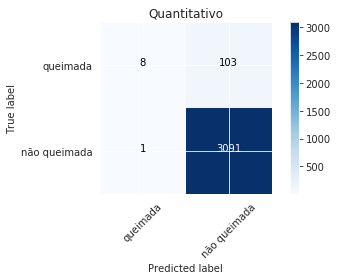

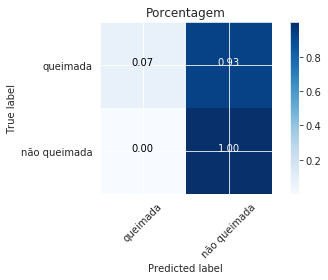

Acertos: 3099/3203 (96%)
LS82210672016347


In [6]:
classificacao.mostra_resultado(y_pred, y_true)
print(id_cena)